# [ERG 190C] Homework 6

<u>Learning Objectives</u>
1. Understand the basic structure of this land-use regression dataset
2. Learn how to run multiple linear regression with scikit learn and interpret coefficients
3. Learn how to interpret p-values, and the pitfalls of p-hacking
4. Learn how to use a model selection criterion like AIC
5. Address some of the potential problems that arise in linear regression models

This homework uses a data set used for the study in Novotny et al ES&T (2011). We'll use it as a basis for exploring multiple linear regression and the important questions one has to ask when running and interpreting results.

We'll be using two different libraries: scikit-learn, and StatsModels. Scikit-learn is preferred in the machine-learning community, and is easier to use for methods concerning prediction(e.g., cross validation). StatsModels is preferred in the statistics and econometrics communities, shares syntax closer to R, and generally provides more statistical information.

### 1. Land Use Regression Dataset  <a id='section1'></a>

In this homework, we are going to use the Land Use Regression Dataset to do basic multiple linear regression using scikit-learn and StatsModels.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

To understand the basic structure of the dataset, read in the .csv file named "BechleLUR_2006_finalmodel.csv" as a Pandas dataframe. Print its first few rows.

In [2]:
# Solution
df_final = pd.read_csv("BechleLUR_2006_finalmodel.csv")
df_final.head()

,Monitor_ID,Latitude,Longitude,State,Location_type,Observed_NO2_ppb,Predicted_NO2_ppb,WRF+DOMINO,800m_Impervious_%,Elevation_truncated_km,800m_MajorRoads_km,100m_MinorRoads_km,Distance_to_coast_km
0,04-013-0019-42602-1,33.48385,-112.14257,Arizona,Suburban,23.884706,20.986643,11.615223,58.9488,0.304,1.35858,0.61637,313.0
1,04-013-3002-42602-6,33.45793,-112.04601,Arizona,Urban And Center City,25.089886,20.990096,11.472677,71.4093,0.304,1.55566,0.26126,323.8
2,04-013-3003-42602-1,33.47968,-111.91721,Arizona,Suburban,19.281969,18.088153,8.990372,53.5480,0.304,1.59508,0.39460,308.4
3,04-013-3010-42602-1,33.46093,-112.11748,Arizona,Suburban,30.645138,20.358009,11.919268,63.1760,0.304,2.42445,0.07244,309.0
4,04-013-4011-42602-1,33.37005,-112.62070,Arizona,Rural,11.070412,8.549622,2.141366,7.7453,0.293,3.18936,0.00000,269.5


**Q1)** If our purpose of using multiple regression is to predict NO2 levels, which column is our response variable? Which columns are our predictor variables? State in words what each represents, along with their units of measurement.

In [3]:
# your answer here

**Sample answer format:** 
- The response variable is the "Observed_NO2_ppb" column, the directly measured $NO_2$ levels (ppb). 
- The predictor variables are the rest of the columns.
- WRF+DOMINO is ... measured in ... (ctrl+f in the article works well)
- (etc.)

### 2. Basic Multiple Regression <a id='section2'></a>

There are several variables that we will not use in our regression, specifically Monitor_ID, Latitude, Longitude, State and Predicted_NO2_ppb.

**Q2.1)** Assign a dataframe without those columns to a new variable called df_final_clean.

In [4]:
# Solution
df_final_clean = df_final.drop(["Latitude", "Longitude", "State", "Predicted_NO2_ppb", 
                                "Location_type", "Monitor_ID"], axis=1)
df_final_clean.head()

,Observed_NO2_ppb,WRF+DOMINO,800m_Impervious_%,Elevation_truncated_km,800m_MajorRoads_km,100m_MinorRoads_km,Distance_to_coast_km
0,23.884706,11.615223,58.9488,0.304,1.35858,0.61637,313.0
1,25.089886,11.472677,71.4093,0.304,1.55566,0.26126,323.8
2,19.281969,8.990372,53.5480,0.304,1.59508,0.39460,308.4
3,30.645138,11.919268,63.1760,0.304,2.42445,0.07244,309.0
4,11.070412,2.141366,7.7453,0.293,3.18936,0.00000,269.5


**Q2.2)** We will start off with scikit-learn. In order to use scikit-learn, we need to organize our data properly.

- Assign X to a dataframe that contains all relevant columns *except for* the response variable.
- Assign Y to only the response variable column.

In [5]:
# Solution
X = df_final_clean.drop("Observed_NO2_ppb", axis=1)
Y = df_final_clean["Observed_NO2_ppb"]

**Q2.3)** Using [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), fit X and Y to a linear model.

In [6]:
# Solution
from sklearn import linear_model
sk_model = linear_model.LinearRegression()
sk_model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Run the cell below to print out the model's intercepts and coefficients.

In [7]:
## RUN THIS CELL - do not edit

# Intercept
print("Intercept:", sk_model.intercept_)
# Coefficients
print("Coefficients:", sk_model.coef_)

Intercept: 2.557225014332216
Coefficients: [ 7.20408718e-01  9.42846187e-02  1.06405415e+01  3.21020598e-01
  2.48321581e+00 -1.19248325e-03]


Notice how scikit-learn is very simple to use, but is not always informative - in this case, we aren't told which columns each these coefficients corresponds to. In order to get this information, we are going to run linear regression using Stats Models.

**Q2.4)** Using [StatsModels](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html), fit X and Y to a linear model, and print out the model summary.

In [8]:
# Solution
import statsmodels.api as sm

# In order to have an intercept, we need to add a column of 1's to X
X2 = sm.add_constant(X)

sm_model = sm.OLS(Y, X2)
results = sm_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Observed_NO2_ppb   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     212.0
Date:                Thu, 11 Oct 2018   Prob (F-statistic):          3.36e-115
Time:                        15:31:20   Log-Likelihood:                -938.93
No. Observations:                 369   AIC:                             1892.
Df Residuals:                     362   BIC:                             1919.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

This output includes much more statistical information, including the p-values of the coefficients!

**Sample answer for coefficient corresponding to Elevation_truncated_km: For every 10.6405 km, the observed NO2 goes up by 1 ppb, so the units of the coefficient is km/ppb. We are 95% confident that the coefficient of the true regression line lies in between 7.243 and 14.038 km/ppb.**

## 3. p-Values and p-Hacking

In the previous problem, we created a multiple regression model by using the package StatsModels. We now use StatsModels to find the p-values of our independent and our dependent variables from the previous problem:

In [9]:
#Run this cell
results.pvalues

const                     2.634006e-09
WRF+DOMINO                1.840009e-58
800m_Impervious_%         2.056259e-21
Elevation_truncated_km    1.950387e-09
800m_MajorRoads_km        1.865722e-04
100m_MinorRoads_km        1.998295e-02
Distance_to_coast_km      2.417248e-03
dtype: float64

In StatsModels, the null hypothesis is defined as there being no statistically significant relationship between the term ($x$) and our prediction ($\hat{y}$). Rejecting the null hypothesis is dependent on the $\alpha$ level, the minimum percentage that you're willing to accept the null (in class, this was 0.05. The other popular $\alpha$ level is 0.01, depending on how strict you would like to make your test).

**Q3.1)** Interpret the p-values for each of the seven variables in results. Determine whether there is a statistically significant relationship between each variable and your predicted variable. You are free to choose your own $\alpha$ value, whatever you feel is appropriate. Fill in the ellipses below.

There answers depend on the $\alpha$ value.

$\alpha$ = (state chosen $\alpha$ value here)

If p-value is smaller than $\alpha$, the variable is statistically significant.
<br> const: ...
<br> WRF+DOMINO: ...
<br> 800m\_Impervious_%: ...
<br> Elevation_truncated_km: ...
<br> 800m_MajorRoads_km: ...
<br> 100m_MinorRoads_km: ...
<br> Distance_to_coast_km: ...

Depending on your $\alpha$ level, some variables may be statistically significant. The bias associated with choosing an $\alpha$ for a p-value to determine significance is an example *p-hacking*. In this case, choosing a higher or lower $\alpha$ level as a result of seeing p-values is subject to this bias (in other words, unless you have a standard go-to $\alpha$ level *before* analyzing the p-values, you were p-hacking). It's often best practice to pick an $\alpha$ level *before* seeing your results, to avoid this bias.


In creating `results`, we added an extra column of ones in order to fit our model properly. Let's dig a little deeper with the `const` column.

**Q3.2)** What does a column of ones represent in terms of the data? Are the ones truely in your data? What does it mean for a column of ones to be statistically significant with your prediction? 

Note: This question is suppose to make you think about the items you're testing for significance. Even though `const` has a very low p-value with your prediction, is there anything meaningful between a column of ones and your prediction?

**answer**: 
- represents the intercept
- ones are not 'truly' in the data
- a statistically significant 'const' estimates a non-zero intercept when all other independent variables are (theoretically) set to zero.

Helpful explanation [here](https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-to-interpret-the-constant-y-intercept) (Thanks, Yiyi!)

## 4. The Akaike Information Criterion and Model Selection

Model selection can be thought of the process of choosing a subset of variables, but in order to do so, we first need a benchmark to compare two models. And given the benchmark, we also need a search strategy. With a limited number a predictors, we are able to search all possible models. An easy way to assess a model is using the Aikake Information Criterion ($\text{AIC}$).

The $\text{AIC}$ assess the ***quality*** of a model given a set of data. Depending on the data that we use in our model, in this case, the features we add, AIC may be used to tell us how our model performs with the data given. Sometimes adding more data (features) improves the quality, sometimes it doesn't. Other times adding the right features may improve the quality.

$\text{AIC}$ is important because we can use it as a form of model selection. **Our goal is to find a model that has the highest *quality* given a list of models.** The higher the quality, the better our model performs and the more desirable it is. Your job in this section is to add features to *final_model* from *allmodelbulidingdata* and assess whether adding specific features improves the model or not. This may seem daunting, but we'll guide you in this process.

Now that you have some information about what AIC is doing and why it's important, we define $\text{AIC}$ as the following:

$\text{AIC} = 2 \times (\text{number of features}) - 2 \times \log(\text{maximum value of likelihood function})$

where $\log$ is $\ln$.  The smaller $\text{AIC}$ is, the greater the model performs. A likelihood function is a statistical topic that we won't go into, but we'll provide the code on how to implement it.

(*A side note about AIC given in lecture*: The function for AIC given in lecture (and the ISLR textbook) is $(\text{RSS} + 2d\hat{\sigma}^2)/(n\hat{\sigma}^2)$.  This formula gives an intuitive sense for what makes AIC high or low, but it's not so easy to compute.  That's because $\hat{\sigma}^2$ is an estimate of the variance of the true model error, which as you can imagine is problematic to compute when the true model is unknown.  There are ways to estimate $\hat{\sigma}$, but using the log-likelihood formula above is easier, so we use it here.)

In [12]:
df_all = pd.read_csv('BechleLUR_2006_allmodelbuildingdata.csv')

**Q4.1)** Fill in the code below to complete the AIC formula using the log likelihood.  `statsmodels` returns log likelihood from the fitted model using the right syntax.  Note that `statsmodels` also returns AIC directly, but we'd like you to do at least *a little* work to compute AIC here!

In [13]:
#Solution
def computeAIC(fit_model, k):
    
    llf = fit_model.llf
   
    AIC = 2 * k  - 2 * llf 
    return AIC

Now that we defined our AIC function, we can now test a new model to see if it's better than the final model. Let's start by assessing the AIC of the final model. This way, we will have a baseline to compare different models to the final one.

**Q4.2)** Use the function that we defined in the previous question to compute the AIC of the final model in part 2 of the homework.

In [16]:
#SOLUTION
computeAIC(results, 7)

#check that this is equal to the AIC calculated via statsmodel above
#note that k is the number of all estimated parameters, so that includes the intercept (column of ones)

1891.8609796174792

As stated earlier, the lower the AIC the better. Let's choose our own features and see if we can create a model that has a comparable AIC; we can start off choosing a few features and see what we get.


**Q4.3)** Choose the features `Population_800`, `Major_1200`, `Impervious_2500`, `Major_400`, and choose two more of your choice! Then, fit this model and calculate the AIC.

In [19]:
#Example Solution
X_2 = df_all[['Population_800', 'Major_1200', 'Impervious_2500', 'Major_400', 'total_13500', 'Resident_3500']]

X_2const = sm.add_constant(X_2)

sm_model_2 = sm.OLS(Y, X_2const)
results_2 = sm_model_2.fit()

computeAIC(results_2, X_2const.shape[1])

2091.7873775636544

This model isn't too bad compared to the AIC of our first model. Lets compute one with fewer features.

**Q4.4)** From the previous model, keep only `Population_800`, `Major_400`, and `Major_1200` and calculate the AIC. 

In [23]:
#SOLUTION
X_3 = df_all[['Population_800', 'Major_400', 'Major_1200']]

X_3const = sm.add_constant(X_3)
Y = df_all[['Observed_NO2_ppb']]

sm_model_3 = sm.OLS(Y, X_3const)
results_3 = sm_model_3.fit()

computeAIC(results_3, X_3const.shape[1])

2227.064157496991

We've created two models and can compare the AIC with the model from the paper. The following question asks about certain drawbacks of deliberate feature selection.

**Q4.5)** What would happen if we choose too few features? How about too many? What are some problems that can arise by deliberate choosing specific features to minimize the AIC, and in general when generating a model?

- low k = high AIC value, penalized by llf
- high k = also high-ish AIC value, penalized by k

Some relevant stackexchange posts [here](https://stats.stackexchange.com/questions/81427/aic-guidelines-in-model-selection) and [here](https://stats.stackexchange.com/questions/78949/when-is-it-appropriate-to-select-models-by-minimising-the-aic) on the validity of using AIC for model selection.

**Q4.6)**: This one's open-ended.  Do what you need to in order to make a plot that shows how AIC varies with the number of independent variables you include in the model.  The plot should have number of variables, $k$, on the x-axis and AIC on the y-axis.  You can use any method you wish to select the variables for each $k$, but explain what you did.  

In [31]:
### Possible solution.  
num_features = []
model_aic = []
indx = np.random.randint(6,df_all.shape[1], size = 6)
for i in range(6, df_all.shape[1]):
    indx = np.append(indx, np.random.randint(6,df_all.shape[1]))
    X = df_all.iloc[:, indx]
    Xconst = sm.add_constant(X)
    sm_model = sm.OLS(Y, Xconst)
    results = sm_model.fit()
    aic = results.aic
#    aic = computeAIC(results, X.shape[1]+1)
    num_features.append(i-5)
    model_aic.append(aic)

In the code above, we choose variables at random.  An alternative approach could be to just choose in order of appearance in the data frame.  For example, the first model would be built with variables 1.

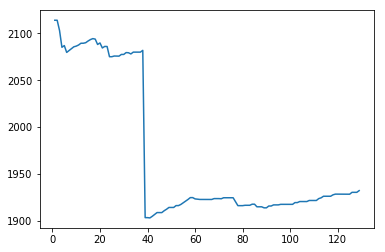

In [32]:
model_aic_vals = pd.DataFrame({'features':num_features, 'aic':model_aic})
plt.plot(model_aic_vals['features'].values, model_aic_vals['aic'].values)

---

## Bibliography

- Rowan Langford - "Stats Models vs SKLearn for Linear Regression". https://becominghuman.ai/stats-models-vs-sklearn-for-linear-regression-f19df95ad99b
- Sean Boland - "
Scikit-learn vs. StatsModels: Which, why, and how?" - https://blog.thedataincubator.com/2017/11/scikit-learn-vs-statsmodels/
- Scikit-learn Documentation - "Linear Regression" - http://scikit-
learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- StatsModels Documentation - "OLS" - https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

---
Notebook developed by: Kevin Marroquin, Rebekah Tang, Alex McMurry, Joshua Asuncion

Data Science Modules: http://data.berkeley.edu/education/modules
